# 6.4 Supervised Machine Learning: Regression

### Content List:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Hypothesis
#### 4.Data prep for regression analysis
#### 5. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Remove scientific notation
pd.options.display.float_format='{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
#Create data path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A6\24-03-2024 TransferMarkt'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'big5_player_list.csv'), index_col=False)

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'unique_id', 'player_name', 'age',
       'country_of_citizenship', 'current_club_country', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [6]:
#Delete columns not necessary for anaysis
big5_df = df.drop (columns = ['Unnamed: 0'])

In [7]:
big5_df.columns

Index(['unique_id', 'player_name', 'age', 'country_of_citizenship',
       'current_club_country', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [8]:
big5_df.head()

,unique_id,player_name,age,country_of_citizenship,current_club_country,market_value_in_eur,highest_market_value_in_eur
0,0,Henrikh Mkhitaryan,35,Armenia,Italy,6000000,37000000
1,1,Lukas Hradecky,34,Finland,Germany,2500000,12000000
2,2,Frederik Rönnow,31,Denmark,Germany,5500000,5500000
3,3,Thomas Foket,29,Belgium,France,7000000,7000000
4,4,Rémy Cabella,34,France,France,4000000,14000000


In [9]:
big5_df.shape

(2431, 7)

##### Missing values

In [10]:
# Check for missing values
big5_df.isnull().sum()


unique_id                      0
player_name                    0
age                            0
country_of_citizenship         0
current_club_country           0
market_value_in_eur            0
highest_market_value_in_eur    0
dtype: int64

##### Duplicates check

In [11]:
dups = big5_df.duplicated()

In [12]:
dups.shape # No dups

(2431,)

##### Summary Stats checks

In [13]:
big5_df.describe()

,unique_id,age,market_value_in_eur,highest_market_value_in_eur
count,2431.0000,2431.0000,2431.0000,2431.0000
mean,1215.0000,26.3488,11905645.8248,18685438.0913
std,701.9136,4.5013,17475206.9745,22200945.4926
min,0.0000,16.0000,50000.0000,50000.0000
25%,607.5000,23.0000,2000000.0000,4000000.0000
50%,1215.0000,26.0000,5000000.0000,10000000.0000
75%,1822.5000,29.0000,15000000.0000,25000000.0000
max,2430.0000,43.0000,180000000.0000,200000000.0000


### 3. Hypothesis

#### Age influences the market value- the older the player gets the more his market value increases.

### 4. Data prep for regression analysis 

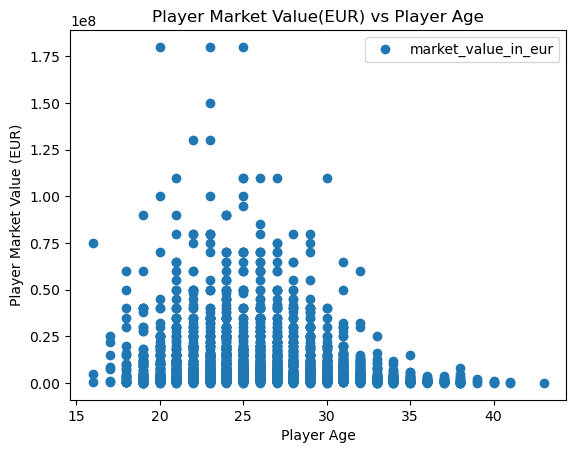

In [14]:
# Create a scatterplot using matplotlib.

df.plot(x = 'age', y='market_value_in_eur',style='o') 
plt.title('Player Market Value(EUR) vs Player Age')  
plt.xlabel('Player Age')  
plt.ylabel('Player Market Value (EUR)')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['market_value_in_eur'].values.reshape(-1,1)

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
X

array([[35],
       [34],
       [31],
       ...,
       [24],
       [17],
       [21]], dtype=int64)

In [18]:
y

array([[6000000],
       [2500000],
       [5500000],
       ...,
       [2000000],
       [1000000],
       [2000000]], dtype=int64)

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [20]:
# Create a regression object.
regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

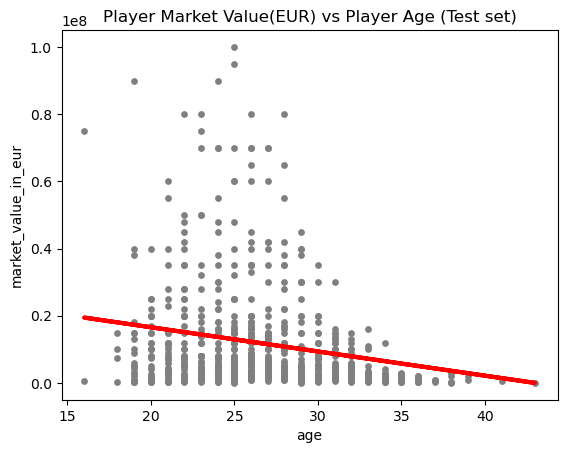

In [23]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Player Market Value(EUR) vs Player Age (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('market_value_in_eur')
plot_test.show()

In the area where the market value is low (0 to 0.50), there are still many data points that indicate low market value,
regardless of the age of the player. 
With most high market value points at the mean age this contradicts the hypothesis.

In [24]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score. 

In [25]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-720495.91978629]]
Mean squared error:  242520516852303.9
R2 score:  0.04723549218855683


In [26]:
y_predicted

array([[ 1.15209888e+07],
       [ 1.29619806e+07],
       [ 1.15209888e+07],
       [ 1.22414847e+07],
       [ 5.75702145e+06],
       [ 1.36824766e+07],
       [ 1.44029725e+07],
       [ 1.22414847e+07],
       [ 7.91850921e+06],
       [ 1.72849562e+07],
       [ 1.29619806e+07],
       [ 8.63900513e+06],
       [ 1.22414847e+07],
       [ 9.35950105e+06],
       [ 1.15209888e+07],
       [ 1.00799970e+07],
       [ 1.08004929e+07],
       [ 1.65644602e+07],
       [ 1.29619806e+07],
       [ 8.63900513e+06],
       [ 1.22414847e+07],
       [ 1.36824766e+07],
       [ 1.08004929e+07],
       [ 1.44029725e+07],
       [ 1.22414847e+07],
       [ 7.91850921e+06],
       [ 1.08004929e+07],
       [ 1.22414847e+07],
       [ 1.44029725e+07],
       [ 1.36824766e+07],
       [ 1.72849562e+07],
       [ 9.35950105e+06],
       [ 1.29619806e+07],
       [ 1.44029725e+07],
       [ 5.75702145e+06],
       [ 1.15209888e+07],
       [ 1.65644602e+07],
       [ 1.29619806e+07],
       [ 1.6

Slope = negative slope with highMSe= model's predictions are very far from the actual values.
R2 explains 4.7% of the variance in the Market Value. This indicates that the model's ability to explain the variation in the Market Value is relatively low.
The very high MSE and low R2 score indicate that the model is not performing well in predicting the Market Value based on the players age.



In [27]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2500000,11520988.8075
1,100000,12961980.6471
2,15000000,11520988.8075
3,1000000,12241484.7273
4,300000,5757021.4492
5,250000,13682476.5668
6,8000000,14402972.4866
7,40000000,12241484.7273
8,1000000,7918509.2086
9,5000000,17284956.1658


##### Compare how the regression fits the training set

In [28]:
# Predict X_train
y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-720495.91978629]]
Mean squared error:  316280628069123.2
R2 score:  0.0326763912000938


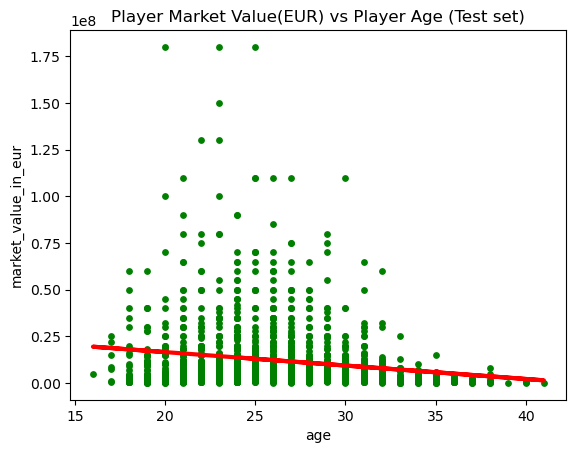

In [31]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Player Market Value(EUR) vs Player Age (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('market_value_in_eur')
plot_test.show()